### Distribuciones discretas importantes

- https://udla.brightspace.com/d2l/lor/viewer/view_private.d2l?ou=154307&loIdentId=278

### Bernoulli

In [ ]:
np.isclose([0, 1], [0, 0])

array([ True, False])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### code
def bernoulli(p):
    return (np.random.random() < p)*1

p = 0.2  # success probability

bernoulli(p)

0

### Binomial

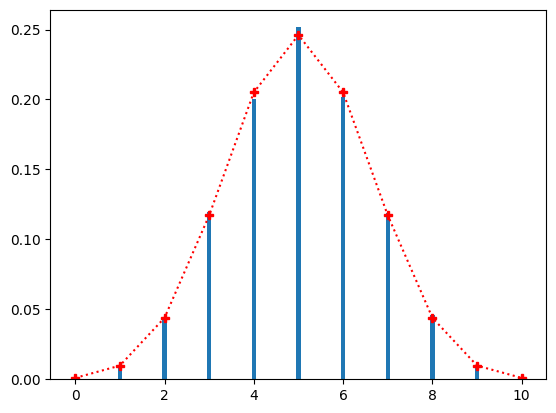

In [ ]:
### code
from scipy.stats import binom

def binomial(n, p):
    return sum([bernoulli(p) for _ in range(n)])

n, p = 10, 0.5  # tries, success probality

sims = 10000
X = np.array([binomial(n, p) for _ in range(sims)])
x, fx = np.unique(X, return_counts=True)

plt.bar(x, fx/fx.sum(), width=0.1)
plt.plot(x, binom.pmf(x, n, p), ':Pr')

### Geometric

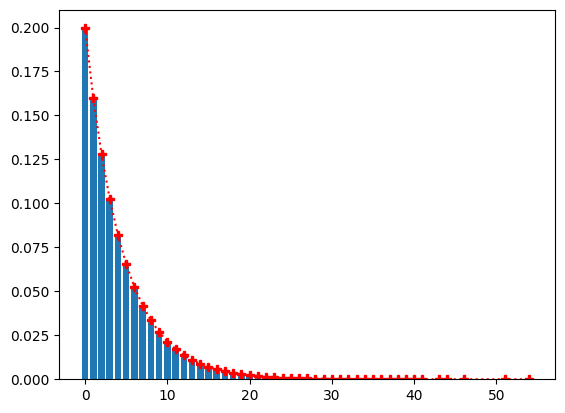

In [ ]:
### code
from scipy.stats import geom

p = 1/5

def geometric(p):
    x = 0
    while not bernoulli(p):
        x += 1
    return x

sims = 100000

X = np.array([geometric(p) for _ in range(sims)])
x, fx = np.unique(X, return_counts=True)

plt.bar(x, fx/fx.sum())
plt.plot(x, geom.pmf(x+1, p), ':Pr')

### Negative binomial

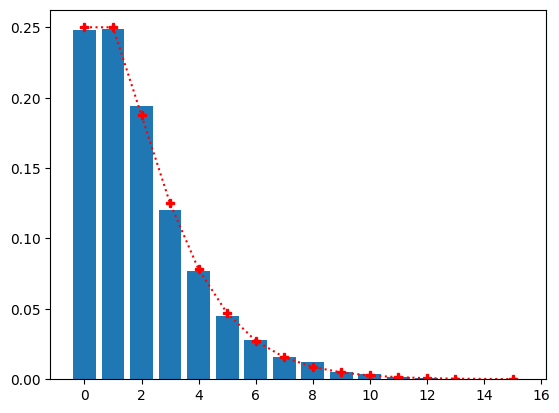

In [ ]:
### code
from scipy.stats import nbinom

def negbinom(p, r):
    x = 0
    for _ in range(r):
        x += geometric(p)

    return x

r = 2  # sucesses
p = 0.5

sims = 10000
X = np.array([negbinom(p, r) for _ in range(sims)])
x, fx = np.unique(X, return_counts=True)

plt.bar(x, fx/fx.sum())
plt.plot(x, nbinom.pmf(x, r, p), ':Pr')

### Poisson

In [ ]:
### code ITS: Inverse transform sampling
def Poisson(l):
    u = np.random.random()
    cp = np.exp(-l)  # CDF
    k = 0
    factorial_k = 1
    while cp < u:
        k = k + 1
        factorial_k = factorial_k * k
        cp = cp + np.exp(-l) * l**k / factorial_k  # CDF
    return k

l = 5

Poisson(l)

3

### Hypergeometric

![](https://i.imgur.com/jGp0QIZ.png)


<BarContainer object of 5 artists>

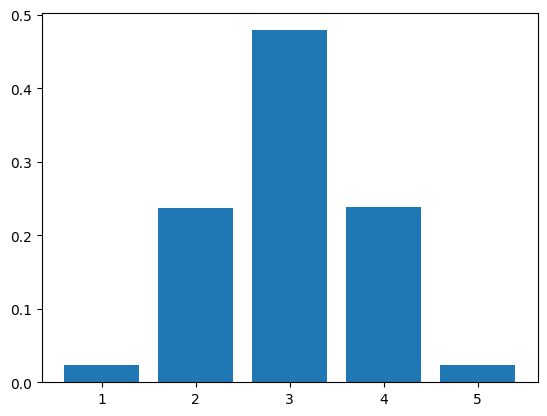

In [ ]:
### code
w = 6
b = 4
n = 5  # sample size

def hypergeometric(w, b, n, size=1):
    urna = [1]*w + [0]*b
    X = []
    for _ in range(size):
        np.random.shuffle(urna)
        X += [sum(urna[:n])]
    if size == 1:
        X = X[0]
    return np.array(X)

X = hypergeometric(w, b, n, size=10000)
x, fx = np.unique(X, return_counts=True)

plt.bar(x, fx/fx.sum())

# Distribuciones discretas

<a id="toc"></a>
## Contenido

- [Distribuciones discretas importantes](#Distribuciones-discretas-importantes)
  - [Distribución de Bernoulli](#bern)
  - [Distribución Binomial](#binom)
    - [Ejemplo](#ejeb)
  - [Distritución Geométrica](#geom)
    - [Ejemplo](#ejeg)
    - [Distribución del primer éxito](#fs)
  - [Distribución Binomial Negativa](#bn)
    - [Ejemplo](#ejebn)
  - [Distribución de Poisson](#poiss)
    - [Ejemplo](#ejep)
    - [Simulación de una v.a. de Poisson **(¡¡¡Importante para el deber!!!)**](#psim)
  - [Distribución Hipergeométrica](#hg)
    - [Ejemplo](#ejehg)
  - [Fuentes y recursos](#Fuentes-y-recursos)

# Distribuciones discretas importantes

[Volver al índice](#toc)

<a id="bern"></a>
## Distribución de Bernoulli

- Se dice que una variable aleatoria, v.a., $X$ tiene una distribución de 
Bernoulli con parámetro $p$, si 
$P(X = 1) = p$ y $P(X = 0) = 1 - p$, donde $0 < p < 1$. 

- Denotamos esto como: $X \sim Bern(p)$. 

- El símbolo $\sim$ se lee "está distribuida como".
Cualquier v.a. cuyos valores posibles son 0 y 1 tiene una distribución $Bern(p)$, 
con probabilidad $p$ de que la v.a. sea 1. 

- El valor de $p$ en $Bern(p)$ es llamado el parámetro de la distribución; 
determina cual distribución específica de Bernoulli tenemos. 

- Por tanto no hay una sola distribución de Bernoulli, 
sino una familia de distribuciones de Bernoulli, dadas por el parámetro $p$. 

- Por ejemplo, si $X \sim Bern(1/3)$, 
sería correcto pero incompleto decir "$X$ es Bernoulli"; 
para especificar completamente la distribución de $X$, 
debemos decir su nombre (Bernoulli) y el valor de su parámetro (1/3), 
que es el objetivo de la notación $X \sim Bern(1/3)$.

**Experimento de Bernoulli**. Un experimento que puede dar como resultado un "éxito" o un "fracaso" (pero no ambos) se denomina experimento de Bernoulli. Se puede pensar en una variable aleatoria de Bernoulli como el indicador de éxito en un ensayo de Bernoulli: es igual a 1 si se produce el éxito y a 0 si se produce un fracaso en el ensayo.

Debido a esta "historia", el parámetro $p$ a menudo se denomina probabilidad de éxito de la distribución de $Bern(p)$.


### PMF de Bernoulli

- Ya hemos visto que podemos escribir la PMF de varias maneras, por ejemplo a través de una tabla, a través de una fórmul, además de poder representarla de forma gráfica. 

- A partir de la tabla siguiente:

| <div style="width:50px">$x$</div>      | <div style="width:60px">$P(X=x)$</div> | <div style="width:100px">$f_X(x)$</div>     |
| ----------- | ----------- | ----------- |
| 0   | 1-p       | $p^0 (1-p)^{1-0}$ |
| 1   | p        | $p^1 (1-p)^{1-1}$ |


- Podemos generalizar y escribir la PMF como:

$$
f_X(x; p) = p^x (1-p)^{1-x},\ x \in \{0, 1\}
$$

- **Valor esperado y varianza:**

$$
E[X] = p,\ Var[X] = p (1 - p)
$$

- Intente calcular el valor esperado y la varianza de la distribución de Bernoulli a partir de la definción dada al inicio de este notebook. 

<a id="binom"></a>
## Distribución Binomial

[Volver al índice](#toc)

- Una vez que conocemos Bernoulli, es difícil no empezar a pensar en lo que sucede cuando tenemos más de un experimento de Bernoulli.

- **Distribución binomial.** Suponga que se realizan $n$ experimentos de Bernoulli independientes, cada uno con la misma probabilidad de éxito $p$. 
  - Sea $X$ el número de éxitos. La distribución de $X$ es llamada distribución Binomial con parámetros $n$ y $p$.

- Escribimos $X \sim Bin(n,p)$ para indicar que $X$ tiene la distribución Binomial con parámetros $n$ y $p$, donde $n$ es un entero positivo y $0 < p < 1.$

- Observe que definimos la distribución Binomial no por su PMF, sino por una historia sobre el tipo de experimento que podría dar lugar a una variable aleatoria con una distribución Binomial. 
  - Las distribuciones más famosas en estadística tienen historias que explican por qué se usan tan a menudo como modelos de datos o como bloques de construcción para distribuciones más complicadas.

- Pensar en las distribuciones con nombre propio (importantes), en términos de sus historias tiene muchos beneficios. 
  - Facilita el reconocimiento de patrones, permitiéndonos ver cuando dos problemas son esencialmente idénticos en estructura; a menudo conduce a soluciones más limpias que evitan los cálculos de PMF por completo; y nos ayuda a comprender cómo las distribuciones nombradas están conectadas entre sí.
  - Aquí está claro que $Bern(p)$ es la misma distribución que $Bin(1, p)$: Bernoulli es un caso especial de la Binomial.


### PMF Binomial 

- Usando la definición de la historia de la Binomial, encontremos su PMF.

- Un experimento que consta de $n$ ensayos de Bernoulli independientes produce una secuencia de éxitos y fracasos. 

- La probabilidad de cualquier secuencia específica de $x$ éxitos y $n - x$ fracasos es $p^x \cdot (1 - p)^{n-k}$. 
  - Hay ${n \choose x}$ tales secuencias, ya que solo necesitamos seleccionar dónde están los éxitos. Por lo tanto, siendo $X$ el número de éxitos, tenemos que,
$$P(X=x) = {n \choose x} p^x (1-p)^{n-x},\ x \in \{0, 1, \dots, n\}$$

- **Ejemplo:** Dada una serie de $n=3$ intentos de Bernoulli con probabilidad de éxito $p=0,5$ (lanzamiento de una moneda), el espacio muestral viene dado por la siguiente figura:

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/binom.png" alt="drawing" width="600"/>

- Entonces podemos escribir la PMF de la siguiente manera:

| <div style="width:50px">$x$</div>      | <div style="width:100px">$P(X=x)$</div> | <div style="width:100px">$f_X(x)$</div>     |
| ----------- | ----------- | ----------- |
| 0   | 1/8       | ${3 \choose 0} p^0 (1-p)^{3-0}$ |
| 1   | 3/8        | ${3 \choose 1} p^1 (1-p)^{3-1}$ |
| 2   | 3/8        | ${3 \choose 2} p^2 (1-p)^{3-2}$ |
| 3   | 1/8        | ${3 \choose 3} p^3 (1-p)^{3-3}$ |

- Vea que podemos generalizar la PMF en la tabla anterior usando la función $f_X(x; n, p)$ a continuación. 

$$
X \sim Bin(x; n, p)
$$

$$
f_X(x; n, p) = {n \choose x} p^x (1-p)^{n-x},\ x \in \{0, 1, \dots, n\}
$$

- **Valor esperado y varianza:**

$$
E[X] = np,\ Var[X] = n p (1 - p)
$$

- **Explore la distribución binomial de manera interactiva:** https://en-interactive.herokuapp.com/#/4/1


### PMF de la distribución binomial para diferentes valores de los parámetros 

- Python implementa las función PMF para la mayoría de distribuciones comunes:
  - Para el caso de la distribución binomial:
```Python
from scipy.stats import binom  # implementación de la binomial en scipy.stats
```
  - PMF:
```Python
binom.pmf(x, n, p)
```

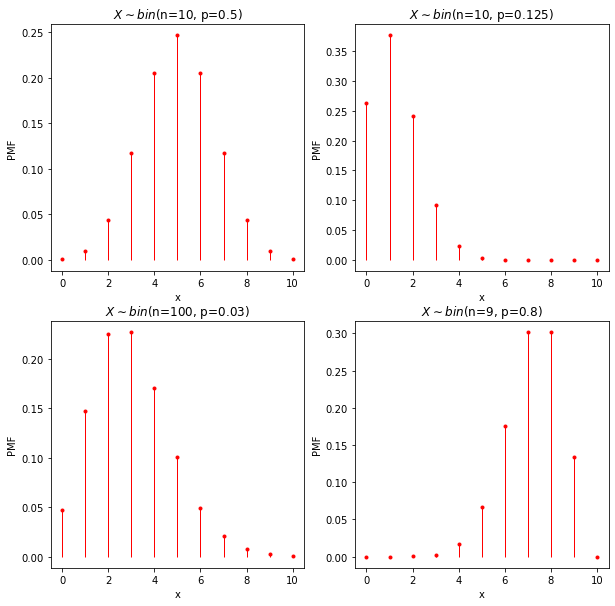

In [ ]:
from scipy.stats import binom  # implementación de la binomial en scipy.stats

# lista de parámetros [(n1, p1, panel1), (n2, p2, panel2), ...]
parametros = [(10, 1/2, 1), (10, 1/8, 2), (100, 0.03, 3), (9, 4/5, 4)]

plt.figure(figsize=(10,10))
# recorremos la lista asignando la tupla a los valores n y p
for n, p, panel in parametros:
    # evaluaremos un subconjunto de los valores posibles de la v.a. x={0,...,10}
    # range no incluye el valor final 11
    x = range(11) 
    pmfx = binom.pmf(x, n, p)  # Evalúa la PMF, 𝑓𝑋(𝑥;𝑛,𝑝) definida arriba
    plt.subplot(2, 2, panel)  # 4 paneles 2filas x 2columnas
    plt.vlines(x, [0]*len(x), pmfx, color="r", lw=1)  # grafica las líneas verticales
    plt.plot(x, pmfx, '.', color='r')  # grafica los puntos
    plt.xlabel("x"); plt.ylabel("PMF")  # etiqueta de los ejes
    plt.title(r"$X \sim bin($n="+ str(n) + ", p=" + str(p) +")")  # título de cada panel

<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>

- Inteprete en las figuras arriba la simetría de la distribución de acuerdo al parámetro $p$. 
  - Intente cambiar en el código los valores de los parámetros, $n$ y $p$ y los valores de $x$ que se evalúan si fuera necesario. 

<a id="ejeb"></a>
### Ejemplo

[Volver al índice](#toc)

La probabilidad de que un paciente se recupere de una rara
enfermedad sanguinea es de 0.4. Si se sabe que 15 personas
contrajeron la enfermedad, ¿cual es la probabilidad de que 

**a) sobrevivan al menos 10, $P(X \geq 10)$:**

- Para los parámetros $n=15, p=0.4$, 

$$P(X \geq 10) = \sum_{x=10}^{15} {15 \choose x} 0.4^x (1-0.4)^{15-x}=0.033833.$$

- Otra solución es: $P(X \geq 10) = 1 - P(X \leq 9)$:

$$P(X \geq 10) = 1 - \sum_{x=0}^{9} {15 \choose x} 0.4^x (1-0.4)^{15-x}=0.033833.$$

- Note que en la solución arriba $P(X \leq 9)$ corresponde a la CDF, $F(9)$, por tanto podemos escribir la solución como $P(X \geq 10) = 1 - F(9)$.

- Debemos tener cuidado cuando evaluamos la PMF o la CDF para que refleje los valores que estamos considerando, por este motivo usamos $P(X \geq 10) = 1 - F(9)$ y no $P(X \geq 10) = 1 - F(10)$, dado que en este último caso no estamos incluyendo $X=10$ en nuestro análsis.

**b) sobrevivan de 3 a 8 $P(3\leq X \leq 8)$:**

$$P(3\leq X \leq 8) = \sum_{x=3}^{8} {15 \choose x} 0.4^x (1-0.4)^{15-x}=0.877839$$

- Usando la CDF tenemos:
$$P(3\leq X \leq 8) = F(8)-F(2)=0.877839$$

**c) sobrevivan exactamente 5:**

$$P(X = 5) = {15 \choose 5} 0.4^5 (1-0.4)^{15-5}=0.185938$$

- Usando la CDF tenemos:
$$P(X = 5) = F(5)-F(4)=0.185938$$

### Implementaremos la PMF y la CDF de la binomial en Python:

In [ ]:
# la función comb calcula el número de combinaciones
from scipy.special import comb

def binomial_pmf(x, n, p):
    # x es un valor entero, o una lista de valores enteros
    # n, p los parámetros de la distribución
    # si el usuario pasa una lista, esta se transforma en un array de numpy
    x = np.array(x)
    return comb(n, x) * p**x * (1-p)**(n-x)  # Evalúa la PMF, 𝑓𝑋(𝑥;𝑛,𝑝)

def binomial_cdf(x, n, p):
    # x es un valor entero, P(X<=x)
    # n, p los parámetros de la distribución
    # generamos un array de 0 a x
    x = np.array(range(0, x+1))
    return binomial_pmf(x, n, p).sum()  # Evalúa la CDF

print("Inciso a)")
print("Evaluando la PMF:", binomial_pmf([10, 11, 12, 13, 14, 15], 15, 0.4).sum().round(6))
print("Evaluando la CDF:", 1-binomial_pmf([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 15, 0.4).sum().round(6))
print("Evaluando la CDF:", 1-binomial_cdf(9, 15, 0.4).round(6))

print("\nInciso b)")
print("b) evaluando la PMF:", binomial_pmf([3, 4, 5, 6, 7, 8], 15, 0.4).sum().round(6))
print("b) evaluando la CDF:", (binomial_cdf(8, 15, 0.4).sum() - binomial_cdf(2, 15, 0.4)).round(6))

print("\nInciso c)")
print("b) evaluando la PMF:", binomial_pmf(5, 15, 0.4).round(6))
print("b) evaluando la CDF:", (binomial_cdf(5, 15, 0.4).sum() - binomial_cdf(4, 15, 0.4)).round(6))

Inciso a)
Evaluando la PMF: 0.033833
Evaluando la CDF: 0.033833
Evaluando la CDF: 0.033833

Inciso b)
b) evaluando la PMF: 0.877839
b) evaluando la CDF: 0.877839

Inciso c)
b) evaluando la PMF: 0.185938
b) evaluando la CDF: 0.185938


- Python implementa las funciones PMF y CDF 
```Python
from scipy.stats import binom  # implementación de la binomial en scipy.stats
```
  - PMF:
```Python
binom.pmf(x, n, p)
```
  - CDF:

```Python
binom.cdf(x, n, p)
```

- Vea su uso a continuación:

In [ ]:
print("Inciso a)")
print("Evaluando la PMF:", binom.pmf([10, 11, 12, 13, 14, 15], 15, 0.4).sum().round(6))
print("Evaluando la CDF:", 1-binom.pmf([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 15, 0.4).sum().round(6))
print("Evaluando la CDF:", 1-binom.cdf(9, 15, 0.4).round(6))

print("\nInciso b)")
print("b) evaluando la PMF:", binom.pmf([3, 4, 5, 6, 7, 8], 15, 0.4).sum().round(6))
print("b) evaluando la CDF:", (binom.cdf(8, 15, 0.4).sum() - binom.cdf(2, 15, 0.4)).round(6))

print("\nInciso c)")
print("b) evaluando la PMF:", binom.pmf(5, 15, 0.4).round(6))
print("b) evaluando la CDF:", (binom.cdf(5, 15, 0.4).sum() - binom.cdf(4, 15, 0.4)).round(6))

Inciso a)
Evaluando la PMF: 0.033833
Evaluando la CDF: 0.033833
Evaluando la CDF: 0.033833

Inciso b)
b) evaluando la PMF: 0.877839
b) evaluando la CDF: 0.877839

Inciso c)
b) evaluando la PMF: 0.185938
b) evaluando la CDF: 0.185938


- La PMF y la CDF de la distribución del ejemplo $X \sim bin(n=15, p=0.4)$ se muestra a continuación

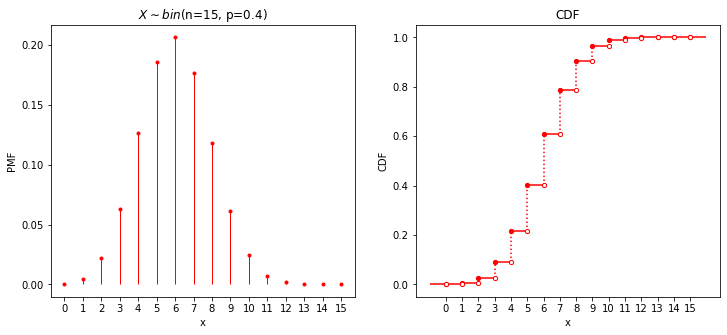

In [ ]:
# Parámetros de la distribución binomial
n, p = 15, 0.4

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))  # Dos paneles ax1 y ax2

# Panel 1: ax1
x = range(n+1)  # evaluaremos un subconjunto de los valores posibles de la v.a. x={0,...,15} 
pmfx = binom.pmf(x, n, p)  # Evalúa la PMF, 𝑓𝑋(𝑥;𝑛,𝑝) definida arriba
ax1.vlines(x, [0]*len(x), pmfx, color="r", lw=1)  # grafica las líneas verticales
ax1.plot(x, pmfx, '.', color='r')  # grafica los puntos
ax1.set_xlabel("x"); ax1.set_ylabel("PMF")  # etiqueta de los ejes
ax1.set_title(r"$X \sim bin($n="+ str(n) + ", p=" + str(p) +")")  # título del panel
ax1.set_xticks(range(n+1))  # define xticks
ax1.set_xticklabels(range(n+1))  # define etiquetas de xticks

# Panel 2: ax2
xcdf = np.array(range(-1,17))
Fx = binom.cdf(x, n, p) 
plot_cdf(xcdf, Fx, ax=ax2)
ax2.set_title("CDF")  # título del panel
ax2.set_xlabel("x"); ax2.set_ylabel("CDF")  # etiqueta de los ejes
ax2.set_xticks(range(n+1))
xt = ax2.set_xticklabels(range(n+1))

- Podemos usar la implementación en Python de la binomial para calcular su valor esperado y varianza:

```Python
binom.expect(args=(15, 0.4))
binom.var(15, 0.4)
```

In [ ]:
# Parámetros de la distribución binomial
n, p = 15, 0.4

print("E[X] =", n*p)
print("Var[X] =", np.round(n*p*(1-p), 4))

print("E[X] =", binom.expect(args=(15, 0.4)).round(4))
print("Var[X] =", binom.var(15, 0.4).round(4))

E[X] = 6.0
Var[X] = 3.6
E[X] = 6.0
Var[X] = 3.6


- Podemos esperar que en promedio se recuperen 6 pacientes de esta rara enfermedad. 

- **Compruebe que los valores calculados son correctos.**
  - Vea la fórmula del valor esperado y de la varianza para una distribución binomial.  

<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>

- A partir de la gráfica de la PMF, interprete los valores usados para calcular los incisos del ejercicio.
- A partir de la gráfica de la CDF, interprete los saltos usados para calcular los incisos del ejercicio.

<a id="geom"></a>
## Distritución Geométrica

[Volver al índice](#toc)

- Considere una secuencia de ensayos de Bernoulli independientes,
cada uno con la misma probabilidad de éxito $p \in (0, 1)$,
con ensayos realizados hasta que se produce un éxito.

- Sea $X$ el número de fallos antes de la primera prueba exitosa.
Entonces $X$ tiene una distribución Geométrica con parámetro $p$;
denotamos esto por $X \sim Geom(p)$.

- Por ejemplo, si lanzamos una moneda no trucada hasta que caiga cara por primera vez,
tenemos que, el número de cruces antes de la primera aparición de cara se distribuye como $Geom(1/2)$.

### PMF Geométrica

- Para obtener la PMF geométrica de nuestra historia, imagine los 
experimentos de Bernoulli como una cadena de 0s (fallas) que terminan cuando aparece el primer 1 (éxito).
Cada 0 tiene probabilidad $q = 1 - p$ y el 1 final tiene probabilidad $p$,
por lo que una cadena de $x$ fallas seguidas de un éxito tiene una probabilidad de $q^x \cdot p$.

| <div style="width:50px">$x$</div>  |  <div style="width:60px">Experiment</div>  | <div style="width:60px">$P(X=x)$</div> | <div style="width:60px">$f_X(x)$</div>     |
| ----------- | ----------- | ----------- | ----------- |
| 0  | 1 | p        | $p q^{0}$ |
| 1  | 01 | qp       | $p q^{1}$  |
| 2  | 001 | qqp  | $p q^{2}$  |
| 3  | 0001 | qqqp  | $p q^{3}$  |
|  . |  |  |        |
|  . |  |  |       |
|  . |  |  |       |


- Vea que podemos generalizar la PMF en la tabla anterior usando la función $f_X(x; p)$ a continuación. 

$$
X \sim Geom(x; p)
$$

$$
f_X(x; p) = p (1-p)^{x},\ x \in \{0, 1, 2, \dots \}
$$

- **Valor esperado y varianza:**


$$
E[X] = \frac{q}{p},\ Var[X] = \frac{q}{p^2},\ q = 1 - p
$$

<a id="ejeg"></a>
### Ejemplo

[Volver al índice](#toc)

Se sabe que en cierto proceso de fabricacion **uno de cada 100** 
articulos, en promedio, resulta defectuoso. ¿Cuál es la probabilidad de 
que el quinto artículo que se inspecciona, en un grupo de 100, sea el
primer defectuoso que se encuentra?

- $X$: cuenta fracasos (que el artículo que se inspecciona no sea defectuoso).

- El parámetro de la distribución de nuestra v.a. $X \sim Geom(p)$, es $p=1/100$.

- El experimento geométrico se detiene cuando aparece el primer éxito. 
  - Éxito en el ejemplo es encontrar un artículo defectuoso. 
  - El quinto que se inspecciona equivale a 4 fracasos: $00001$, ó $qqqqp$
  
- Por tanto calculamos:

  - $P(X=4)$, probabilidad de que ocurran 4 fracasos (inspeccionamos 4 artículos no defectuosos hasta encontrar el primer defectuoso). 
  
$$
f_X(x; p) = p (1-p)^{x},\ x = f_X(4; 1/100) = 1/100 (1-1/100)^{4} = 0.0096059601.
$$

- Usando la CDF: $P(X=4) = F(4) - F(3) = 0.0096059601.$

  - La probabilidad de 
que el quinto artículo que se inspecciona, en un grupo de 100, sea el
primer defectuoso que se encuentra es de 0.0096.

In [ ]:
def geom_pmf(x, p):
    # x es un valor entero, o una lista de valores enteros
    # p parámetro de la distribución
    x = np.array(x)  # transformamos a numpy array
    return p*(1-p)**x  # implementa 𝑓𝑋(𝑥;𝑝)

def geom_cdf(x, p):
    # x es un valor entero, P(X<=x)
    # p parámetro de la distribución
    x = np.array(range(0, x+1))
    return geom_pmf(x, p).sum()  # Evalúa la CDF

print("Evaluando la PMF:", geom_pmf(4, 1/100).round(10))
print("Evaluando la CDF:", (geom_cdf(4, 1/100)-geom_cdf(3, 1/100)).round(10))

Evaluando la PMF: 0.0096059601
Evaluando la CDF: 0.0096059601


<a id="fs"></a>
### Distribución del primer éxito

[Volver al índice](#toc)

- En una secuencia de 
experimentos independientes de Bernoulli con probabilidad de éxito $p$,
sea $Y$ el número de intentos hasta que
primer experimento exitoso, incluido el éxito.

- Entonces $Y$ tiene la distribución del primer éxito 
con parámetro $p$; denotamos esto por $Y \sim FS(p)$.

$$
\text{If } Y \sim FS(p),\ \text{then } Y-1 \sim Geom(p) 
$$

- Podemos convertir entre las PMF de $Y$ y $Y-1$ por
$$
P(Y=k) = P (Y-1 = k-1) 
$$

- Al contrario, si
$$
X\sim Geom(p),\ \text{ entonces } X+1 \sim FS(p)
$$

- Valor esperado de la distribución del primer éxito

$$
E(Y)=E(X+1)=\frac{q}{p}+1=\frac{1}{p}
$$

- Python implementa la distribución del primer éxito, para resolver el ejercicio anterior debemos responder $P(X=5)$.

In [ ]:
from scipy.stats import geom

fracasos = 4 # X
# PMF de X+1 para la distribución del primer éxito
print("Evaluando la PMF:", geom.pmf(fracasos + 1, p=1/100))

Evaluando la PMF: 0.0096059601


- Usando la CDF, $P(X=4) = F(4) - F(3)$:

In [ ]:
print("Evaluando la CDF:", (geom.cdf(fracasos + 1, p=1/100) - geom.cdf(fracasos, p=1/100)).round(10))

Evaluando la CDF: 0.0096059601


- La PMF y la CDF de la distribución del ejemplo $X \sim geom(p=1/100)$ se muestra a continuación

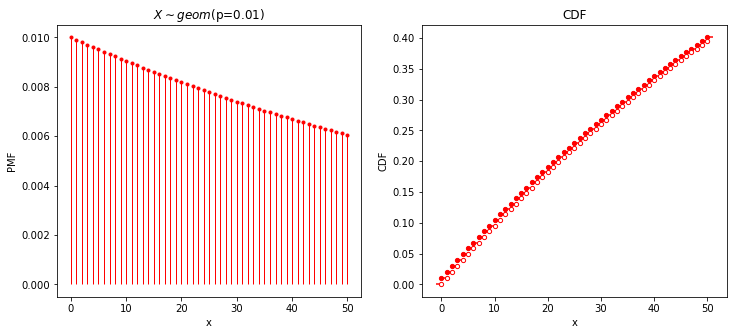

In [ ]:
# Parámetro de la distribución geométrica
p = 1/100

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))  # Dos paneles ax1 y ax2

x_upper = 50

# Panel 1: ax1
x = np.arange(x_upper+1)  # evaluaremos un subconjunto de los valores posibles de la v.a. x={0,...,15} 
pmfx = geom.pmf(x+1, p) # x+1 para tener la distribucón del primer éxito
ax1.vlines(x, [0]*len(x), pmfx, color="r", lw=1)  # grafica las líneas verticales
ax1.plot(x, pmfx, '.', color='r')  # grafica los puntos
ax1.set_xlabel("x"); ax1.set_ylabel("PMF")  # etiqueta de los ejes
ax1.set_title(r"$X \sim geom($p="+ str(p) +")")  # título del panel
ax1.set_xticks(range(0, x_upper+1, 10))  # define xticks
ax1.set_xticklabels(range(0, x_upper+1, 10))  # define etiquetas de xticks

# Panel 2: ax2
xcdf = np.array(range(-1,x_upper+2))
Fx = geom.cdf(x+1, p)  # x+1 para tener la distribucón del primer éxito
plot_cdf(xcdf, Fx, ax=ax2)
ax2.set_title("CDF")  # título del panel
ax2.set_xlabel("x"); ax2.set_ylabel("CDF")  # etiqueta de los ejes
ax2.set_xticks(range(0, x_upper+1, 10))  # define xticks
xt = ax2.set_xticklabels(range(0, x_upper+1, 10))  # define etiquetas de xticks

- Tenga en cuenta que el soporte de la distribución geométrica es no acotada, es decir, $x \in \{0, 1, 2, \dots \}$. 

In [ ]:
# Parámetro de la distribución geométrica
p = 1/100

print("E[X] =", (1-p)/p)
print("Var[X] =", (1-p)/(p**2))

E[X] = 99.0
Var[X] = 9900.0


<a id="bn"></a>
## Distribución Binomial Negativa

[Volver al índice](#toc)

- En una secuencia de experimentos de Bernoulli independientes con probabilidad de éxito $p$,
si $X$ es el número de fallas antes del $r$-ésimo éxito,
entonces se dice que $X$ tiene la distribución Binomial Negativa
con los parámetros $r$ y $p$,
denotado $X \sim NBin(r, p)$.

- Tanto la distribución binomial como la binomial negativa se basan en
ensayos independientes de Bernoulli;
difieren en la regla de parada y en lo que están contando:
elal Binomial cuenta el número de éxitos en un número fijo de intentos,
mientras que la Binomial Negativa cuenta el número de fallos
hasta un número fijo de éxitos.

- A la luz de estas similitudes, no sorprende que
la derivación de la PMF Binomial Negativa tenga una semejanza
a la correspondiente derivación para la Binomial.

### PMF Binomial Negativa

Ejemplo para $X \sim NBin(r=2, p=0.5)$:

| <div style="width:50px">$x$</div>  |  <div style="width:80px">Experiment</div>  | <div style="width:80px">$P(X=x)$</div> | <div style="width:120px">$f_X(x)$</div>     |
| ----------- | ----------- | ----------- | ----------- |
| 0  | 11 | pp        | ${0 + 2 - 1 \choose 2 - 1} p q^{0}$ |
| 1  | **01**1 | **qp**p       | ${1 + 2 - 1 \choose 2 - 1} p^2 q^{1}$  |
| 2  | **001**1 | **qqp**p  | ${2 + 2 - 1 \choose 2 - 1} p^2 q^{2}$  |
| 3  | **0001**1 | **qqqp**p  | ${3 + 2 - 1 \choose 2 - 1} p^2 q^{3}$  |
|  . |  |  |        |
|  . |  |  |       |
|  . |  |  |       |

- Tenga en cuenta que la secuencia en el experimento (en **negritas**) puede ocurrir de varias maneras. 
  - Por ejemplo **{001, 010, 100}**.
  - De ahí la parte de combinación en la fórmula PMF $f_X(x)$.

- Vea que podemos generalizar la PMF en la tabla anterior usando la función $f_X(x; p)$ a continuación. 

$$
X \sim NBin(x; r, p)
$$

$$
f_X(x; r, p) = {x + r - 1 \choose r - 1} p^r (1-p)^{x},\ x \in \{0, 1, 2, \dots\}
$$

- **Valor esperado y varianza:**

$$
E[X] = \frac{qr}{p},\ Var[X] = \frac{qr}{p^2}, q=1-p.
$$

<a id="ejebn"></a>
### Ejemplo

[Volver al índice](#toc)

En la serie de campeonato de la NBA (National Basketball Association), el equipo que gane 4 de 7 juegos sera el ganador. Suponga que los equipos A y B se enfrentan en los juegos de campeonato y que el equipo A tiene una probabilidad de 0.55 de ganarle al equipo B.

- Tenemos una v.a. $X$ que cuenta el número de fracasos, que pierda A un partido, en una serie de basketball.
- $X\sim NBin(r=4, p=0.55)$, $r=4$ indica que al 4to éxito (éxito: **A** gana un partido) se termina el experimento (la serie la gana A). 
  - El parámetro $p=0.55$ corresponde a la probabilidad de que ocurra un éxisto (éxito: **A** gana un partido). 

a) ¿Cuál es la probabilidad de que el equipo A gane la serie en 6 juegos?

- Para que el equipo A gane en 6 juegos solo puede perder 2 veces (tener 2 fracasos). 
$$P(X=2) {2 + 4 - 1 \choose 4 - 1} 0.55^4 (1-0.55)^{2} = 0.18530016$$
  - La probabilidad de que el equipo A gane la serie en 6 juegos es de 0.1853.

b) ¿Cuál es la probabilidad de que el equipo A gane la serie? 
- Para que el equipo A gane la serie puede ocurrir que pierde 1 partido, ó pierde 2, ó pierde 3. Cuatro no puede perder dado que no gana la serie en este caso. 
$$P(X \leq 3) = \sum_{x=0}^3 {x + 4 - 1 \choose 4 - 1} 0.55^4 (1-0.55)^{x}=0.6082878$$
  - La probabilidad de que el equipo A gane la serie es de 0.6083. 

---

<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>

c) Si ambos equipos se enfrentaran en la eliminatoria de una serie regional y el triunfador fuera el que ganara 3 de 5 juegos, ¿cual es la probabilidad de que el equipo A gane la serie?

---

- **Resolvamos los incisos a y b del enunciado, en Python:**

In [ ]:
def nbin_pmf(x, r, p):
    # x es un valor entero, o una lista de valores enteros
    # r, p parámetros de la distribución
    x = np.array(x)
    return comb(x + r - 1 , r - 1) * p**r * (1-p)**(x)


def nbin_cdf(x, r, p):
    # x es un valor entero, P(X<=x)
    # r, p parámetros de la distribución
    x = np.array(range(0, x+1))
    return nbin_pmf(x, r, p).sum()  # Evalúa la CDF

# Parámetros de la distribución binomial negativa
r, p = 4, 0.55

print("a)")
print("Evaluando la PMF:", nbin_pmf(2, r, p).round(8))
print("Evaluando la CDF:", (nbin_cdf(2, r, p) - nbin_cdf(1, r, p)).round(8))

print("b)")
print("Evaluando la PMF:", nbin_pmf([0, 1, 2, 3], r, p).sum().round(8))
print("Evaluando la CDF:", nbin_cdf(3, r, p).round(8))

a)
Evaluando la PMF: 0.18530016
Evaluando la CDF: 0.18530016
b)
Evaluando la PMF: 0.6082878
Evaluando la CDF: 0.6082878


- Usando la implementación en Python

In [ ]:
from scipy.stats import nbinom

# Parámetros de la distribución binomial negativa
r, p = 4, 0.55

print("a)")
print("Evaluando la PMF:", nbinom.pmf(2, r, p).round(8))
print("Evaluando la CDF:", (nbinom.cdf(2, r, p) - nbinom.cdf(1, r, p)).round(8))

print("\nb)")
print("Evaluando la PMF:", nbinom.pmf([0,1,2,3], r, p).sum().round(8))
print("Evaluando la CDF:", nbinom.cdf(3, r, p).round(8))

a)
Evaluando la PMF: 0.18530016
Evaluando la CDF: 0.18530016

b)
Evaluando la PMF: 0.6082878
Evaluando la CDF: 0.6082878


- La PMF y la CDF de la distribución del ejemplo $X \sim NBin(r=4, p=0.55)$ se muestra a continuación

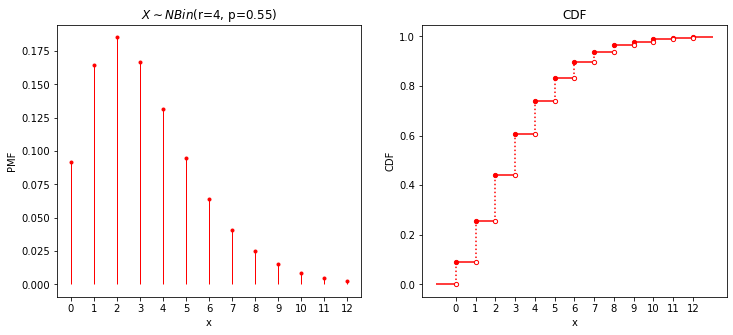

In [ ]:
# Parámetro de la distribución binomial negativa
r, p = 4, 0.55

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))  # Dos paneles ax1 y ax2

x_upper = 12

# Panel 1: ax1
x = np.arange(x_upper+1)  # evaluaremos un subconjunto de los valores posibles de la v.a. x={0,...,15} 
pmfx = nbinom.pmf(x, r, p)  # Evalúa la PMF, 𝑓𝑋(𝑥;𝑛,𝑝) definida arriba
ax1.vlines(x, [0]*len(x), pmfx, color="r", lw=1)  # grafica las líneas verticales
ax1.plot(x, pmfx, '.', color='r')  # grafica los puntos
ax1.set_xlabel("x"); ax1.set_ylabel("PMF")  # etiqueta de los ejes
ax1.set_title(r"$X \sim NBin($r="+ str(r) + ", p=" + str(p) +")")  # título del panel
ax1.set_xticks(range(0, x_upper+1, 1))  # define xticks
ax1.set_xticklabels(range(0, x_upper+1, 1))  # define etiquetas de xticks

# Panel 2: ax2
xcdf = np.array(range(-1,x_upper+2))
Fx = nbinom.cdf(x, r, p) 
plot_cdf(xcdf, Fx, ax=ax2)
ax2.set_title("CDF")  # título del panel
ax2.set_xlabel("x"); ax2.set_ylabel("CDF")  # etiqueta de los ejes
ax2.set_xticks(range(0, x_upper+1, 1))  # define xticks
xt = ax2.set_xticklabels(range(0, x_upper+1, 1))  # define etiquetas de xticks

<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>

- Note que en nuestro problema solo algunos de los valores posibles de la PMF son posibles. 
  - ¿Puede identificar cuales?

<a id="poiss"></a>
## Distribución de Poisson

[Volver al índice](#toc)

- La distribución de Poisson se usa a menudo en situaciones en las que contamos el número de éxitos en una región o intervalo de tiempo en particular, y hay una gran cantidad de intentos, cada uno con una pequeña probabilidad de éxito. 

- Por ejemplo, las siguientes variables aleatorias podrían seguir una distribución que es aproximadamente Poisson.

- **La cantidad de correos electrónicos que recibe en una hora.** Hay muchas personas que podrían enviarle un correo electrónico en esa hora, pero es poco probable que una persona específica realmente le envíe un correo electrónico en esa hora. Alternativamente, imagina subdividir la hora en milisegundos. Hay $3.6\times10^6$ segundos en una hora, pero en cualquier milisegundo específico es poco probable que reciba un correo electrónico.

- **La cantidad de chispas (chips) en una galleta con chispas de chocolate.** Imagina subdividir la galleta en cubos pequeños; la probabilidad de obtener una chispa de chocolate en un solo cubo es pequeña, pero el número de cubos es grande.

- **La cantidad de terremotos en un año en alguna región del mundo.** En cualquier momento y lugar, la probabilidad de que ocurra un terremoto es pequeña, pero hay una gran cantidad de posibles momentos y lugares para que ocurran los terremotos. el transcurso del año.

- Decimos que una v.a. tiene una distribución de Poisson denotada por $X \sim Pois(\lambda)$.

- El parámetro $\lambda$ se interpreta como la tasa de
ocurrencia de estos eventos raros; en los ejemplos anteriores,
$\lambda$ podría ser 20 (correos electrónicos por hora), 10 (chispas por galleta),
y 2 (terremotos por año).

- El paradigma de Poisson dice que en aplicaciones similares a las anteriores,
podemos aproximar la distribución del número de eventos que ocurren
por una distribución de Poisson.

### PMF de Poisson

- Dividimos un intervalo continuo $t$ en $N$ partes de igual ancho $t/N$.
- El evento de observar $x$ éxitos en un intervalo continuo $t$, es equivalente a observar $x$ éxitos en $N$ experimentos de Bernoulli.
- La probabilidad de acierto $p=\lambda (t/N)$ depende únicamente del ancho $t/N$ y de una tasa de acierto $\lambda$.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/line_plot.png" alt="drawing" width="300"/>

- De la distribución binomial tenemos que:

$$bin(x; N, \lambda (t/N)) = {N \choose x} \left( \frac{\lambda t}{N} \right) ^x \cdot \left(1 - \frac{\lambda t}{N} \right)^{N-x}$$

- Queremos asegurar que solo puede ocurrir un éxito en cada subdivisión de $t$,
esto sucede cuando $N \to \infty$. 

- Resolvemos el siguiente límite:

$$ \lim_{N \to \infty} \left[ {N \choose x} \left(\frac{\lambda t}{N}\right)^x \cdot 
\left(1 - \frac{\lambda t}{N}\right)^{N-x} \right]$$

- Podemos reescribir la combinación y la expresión se puede separar con el propósito de calcular los límites de las diferentes partes:

$$\lim_{N \to \infty} \left[ 
    \frac{N!}{(N-x)! x!} \left(\frac{\lambda t}{N}\right)^x \cdot 
\left(1 - \frac{\lambda t}{N}\right)^{N-x} 
\right]$$

$$ \frac{(\lambda t)^x}{x!} \cdot
\lim_{N \to \infty} \left[ 
\frac{N!}{(N-x)!N^x}
\right] \cdot
\lim_{N \to \infty} \left[ 
\left(1-\frac{\lambda t}{N}\right)^N \right] \cdot 
\lim_{N \to \infty} \left[\left(1-\frac{\lambda t}{N}\right)^{-x}
\right]
$$

$$
\lim_{N \to \infty} \left[ 
\frac{N!}{(N-x)!N^x}
\right] = 
\lim_{N \to \infty} \left[ 
\frac{N(N-1)\cdots(N-x+1)}{N^x}
\right] = 1
$$

$$
\lim_{N \to \infty} 
\left[ 
\left(1-\frac{\lambda t}{N}\right)^N
\right] = e^{-\lambda t}
$$

$$
\lim_{N \to \infty} 
\left[ 
{\left(1-\frac{\lambda t}{N}\right)^{-x}}
\right] = 1.
$$

- Al volver a ensamblar las partes, se encuentra que la función binomial tiene un límite igual a:

$$
\lim_{N \to \infty} bin(x;N,\lambda (t/N)) = \frac{(\lambda t)^x}{x!} e^{-\lambda t}
$$

Usualmente asumimos $t=1$, pero si $\lambda$ es constante sobre el intervalo continuo $t$, podríamos usar
$t\geq 1$.

### Resumen

$$
X \sim Poiss(x; \lambda)
$$

$$
f_X(x; \lambda) = \frac{e^{-\lambda} \lambda^x}{x!},\ x \in \{0, 1, 2, \dots\}
$$

- **Valor esperado y varianza:**

$$
E[X] = \lambda,\ Var[X] = \lambda
$$

<a id="ejep"></a>
### Ejemplo

[Volver al índice](#toc)

El numero promedio de camiones-tanque que llega cada dia a cierta ciudad portuaria es 10. Las instalaciones en el puerto pueden alojar a lo sumo 15 camiones-tanque por dia. ¿Cuál es la probabilidad de que en un día determinado lleguen mas de 15 camiones y se tenga que rechazar algunos?

- $X$: cuenta el número de camiones que llegan a la ciudad portuaria.
- Tenemos que $X\sim Poiss(\lambda=10)$ describe nuestra v.a.

- Respondamos:

$$P(X>15)=1-P(X \leq 15) = 1 - \sum_{x=0}^{15} \frac{e^{-\lambda} \lambda^x}{x!} = 0.0487.$$

  - La probabilidad de que en un día determinado lleguen mas de 15 camiones es de 0.0487. 

In [ ]:
from scipy.special import factorial

def poisson_pmf(x, l):
    # x es un valor entero, o una lista de valores enteros
    # l parámetro de la distribución (lambda)
    x = np.array(x)
    return np.exp(-l)*l**(x) / factorial(x)

def poisson_cdf(x, l):
    # x es un valor entero, P(X<=x)
    # l parámetro de la distribución, lambda
    x = np.array(range(0, x+1))
    return poisson_pmf(x, l).sum()

# Parámetro de la distribución de poisson lambda
l = 10

x = np.arange(16)  # valores x={0,1,...,15}

print("Evaluando la PMF:", 1 - poisson_pmf(x, l).sum())
print("Evaluando la CDF:", 1 - poisson_cdf(15, l))

Evaluando la PMF: 0.04874040330397866
Evaluando la CDF: 0.04874040330397866


- Usando la implementación en Python

In [ ]:
from scipy.stats import poisson

# Parámetro de la distribución de poisson lambda
l = 10

x = np.arange(16)  # valores x={0,1,...,15}

print("Evaluando la PMF:", 1 - poisson.pmf(x, l).sum())
print("Evaluando la CDF:", 1 - poisson.cdf(15, l))

Evaluando la PMF: 0.048740403303976554
Evaluando la CDF: 0.04874040330397866


- La PMF y la CDF de la distribución del ejemplo $X \sim Poiss(\lambda=10)$ se muestra a continuación

Media: 10
Varianza: 10


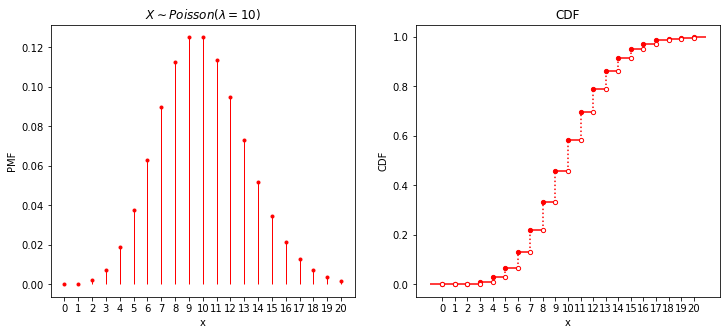

In [ ]:
# Parámetro de la distribución de poisson, lambda
l = 10

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))  # Dos paneles ax1 y ax2

x_upper = 20

# Panel 1: ax1
x = np.arange(x_upper+1)  # evaluaremos un subconjunto de los valores posibles de la v.a. x={0,...,15} 
pmfx = poisson.pmf(x, l)  # Evalúa la PMF, 𝑓𝑋(𝑥;𝑛,𝑝) definida arriba
ax1.vlines(x, [0]*len(x), pmfx, color="r", lw=1)  # grafica las líneas verticales
ax1.plot(x, pmfx, '.', color='r')  # grafica los puntos
ax1.set_xlabel("x"); ax1.set_ylabel("PMF")  # etiqueta de los ejes
ax1.set_title(r"$X \sim Poisson(\lambda=$"+ str(l) +")")  # título del panel
ax1.set_xticks(range(0, x_upper+1, 1))  # define xticks
ax1.set_xticklabels(range(0, x_upper+1, 1))  # define etiquetas de xticks

# Panel 2: ax2
xcdf = np.array(range(-1,x_upper+2))
Fx = poisson.cdf(x, l)
plot_cdf(xcdf, Fx, ax=ax2)
ax2.set_title("CDF")  # título del panel
ax2.set_xlabel("x"); ax2.set_ylabel("CDF")  # etiqueta de los ejes
ax2.set_xticks(range(0, x_upper+1, 1))  # define xticks
xt = ax2.set_xticklabels(range(0, x_upper+1, 1))  # define etiquetas de xticks

print("Media:", l)
print("Varianza:", l)

<a id="psim"></a>
### Simulación de una v.a. de Poisson

[Volver al índice](#toc)

- Cuando observamos un sistema, a lo que tenemos acceso es a una muestra finita de la población. 
  - Cuando asumimos que el sistema puede ser modelado con una distribución dada, siempre tenemos que comprobar que nuestra hipótesis es cierta. 
    - Esto se conoce como ajuste de distribuciones. 
  - Vamos a hacer un ejercicio simple y vamos a observar de manera visual el comportamiento de una muestra y compararlo con la distribución teórica. 

- Vamos a realizar una simulación, un muestreo de una v.a. de Poisson para el ejemplo anterior.
  - $X \sim Poiss(\lambda=10)$.
  - El tamaño de la muestra será de tamaño $n=100$.
  
```Python
np.random.seed(12345)  # semilla aleatoria, queremos replicabilidad

l = 10  # parámetro lambda
n = 100  # tamaño de muestra

# distribución.rvs(paramétros, size)
# genera un vector aleatorio a partir de la distribución y parámetros dados
# size: tamaño del vector devuelto
muestra = poisson.rvs(l, size=n)
```

- Graficaremos las frecuencias observadas en nuestra muestra y compararemos con la distribución teórica de la población $X\sim Poiss(\lambda=10)$.

Media de la muestra: 10.45
Varianza de la muestra: 9.287500000000001
Media poblacional: 10
Varianza poblacional: 10
P(X>15) = 0.06


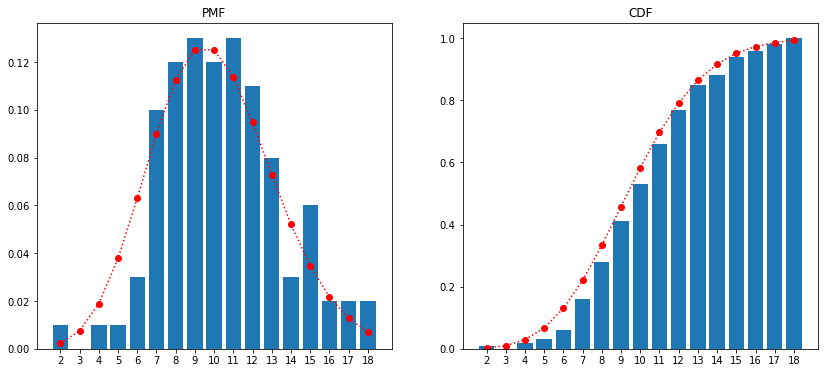

In [ ]:
np.random.seed(12345)  # semilla aleatoria, queremos replicabilidad

l = 10  # parámetro lambda
n = 100  # tamaño de muestra

# distribución.rvs(paramétros, size)
# genera un vector aleatorio a partir de la distribución y parámetros dados
# size: tamaño del vector devuelto
muestra = poisson.rvs(l, size=n)

plt.figure(figsize=(14,6))  # tamaño de la figura

plt.subplot(1,2,1)  # panel 1
# Diagrama de barras
# x: valores únicos en la muestra
# fx: frecuencia de cada valor único x
# fx/fx.sum(): frecuencias relativas
x, fx = np.unique(muestra, return_counts=True)
plt.bar(x, fx/fx.sum())

#Vamos a graficar la distribución teórica (curva PMF en rojo) 
#para los valores observados (barras azules) 
#en la muestra: entre min(x) y max(x)
x_t = np.arange(x.min(), x.max()+1)
plt.plot(x_t, poisson.pmf(x_t, l), ':or')
plt.title("PMF")
plt.xticks(x_t)

plt.subplot(1,2,2)  # panel 2
# x: valores únicos en la muestra
# fx: frecuencia de cada valor único x
# fx/fx.sum(): frecuencias relativas
# (fx/fx.sum()).cumsum(): frecuencias relativas acumuladas
plt.bar(x, (fx/fx.sum()).cumsum())

#Vamos a graficar la distribución acumulada teórica (curva CDF en rojo) 
#para los valores observados (barras azules) 
#en la muestra: entre min(x) y max(x)
plt.plot(x_t, poisson.cdf(x_t, l), ':or')
plt.title("CDF")
t=plt.xticks(x_t)

print("Media de la muestra:", muestra.mean())
print("Varianza de la muestra:", muestra.var())

print("Media poblacional:", l)  # lambda
print("Varianza poblacional:", l)  # lambda

# Podemos responder para nuestra muestra la pregunta P(X>15)
# número de observaciones favorables: len(np.where(muestra > 15)[0])
# total de observaciones, tamaño de muestra: len(muestra), es igual a n
print("P(X>15) =", len(np.where(muestra > 15)[0]) / len(muestra))

- Recordemos que la solución analítica para nuestra pregunta era de $P(X>15) = 0.0487$ y nuestra media y varianza poblacional $\lambda = 10$. 
  - La discrepancia que observamos ocurre debido a que estamos muestreando un subconjunto relativamente pequeño de la población, tamaño de muestra de 100. 
  - Por la ley de los grandes números sabemos que la media muestral tiende a la media poblacional a medida que el tamaño de la muestra tiende a infinito. 

<a id="hg"></a>
## Distribución Hipergeométrica

[Volver al índice](#toc)

- Tenemos una urna llena de $w$ bolas blancas y $b$ bolas negras,
si se sacan $n$ bolas
de la urna con reemplazo se produce una distribución $Bin(n, \frac{w}{(w + b)})$
por el número de bolas blancas obtenidas en $n$ intentos,
dado que los sorteos son ensayos de Bernoulli independientes,
cada uno con probabilidad $p=\frac{w}{(w + b)}$ de éxito.

- Si, en cambio, muestreamos sin reemplazo, entonces el número de bolas blancas sigue una **Distribución hipergeométrica**.

- **Historia hipergeométrica.** Una urna contiene $w = 6$ bolas blancas y $b = 4$ bolas negras. Queremos una muestra muestra de $n = 5$ bolas sin reemplazo. 
  - El número $X$ de bolas blancas en la muestra sigue una distribución Hipergeométrica; aquí observamos $X = 3$.

![](https://i.imgur.com/jGp0QIZ.png)

- Considere una urna con $w$ bolas blancas y $b$ bolas negras.
Sacamos $n$ bolas de la urna al azar sin reemplazo,
tal que todas las muestras de $\binom{w+b}{n}$ son igualmente probables.

- Sea $X$ el número de bolas blancas en la muestra.
Entonces se dice que $X$ tiene la **distribución hipergeométrica**
con parámetros $w, b$ y $n$; denotamos esto por
$X \sim \text{HGeom}(w, b, n),\
P(X=k)=\frac{\binom{w}{k}\binom{b}{n-k}}{\binom{w+b}{n}}$.

### PMF Hipergeométrica

- Si $X \sim \text{HGeom}(K, N, n)$, donde $K$ es el total de elementos de interés (bolas blancas), $N$ el total de elementos en la urna, y $n$ el tamaño de la muestra, 
entonces la PMF 
de $X$ es
$$
f_X(k; K, N, n) = P(X=k)=\frac{\dbinom{K}{k}\dbinom{N-K}{n-k}}{\dbinom{N}{n}}
$$
para enteros $k$ que satisfacen $0 \leq k \leq K$ y
$0 \leq n-k \leq N-K$, 
y $P(X=k)=0$ de lo contrario. Es decir el soporte es: $k\in \{max(0,n+K-N),\dots,min(n,K)\}$.

- **Valor esperado y varianza:**

$$
\mu=\frac{nK}{N}, \quad \sigma^2=n\frac{K}{N}\frac{(N-K)}{N}\frac{N-n}{N-1}
$$

<a id="ejehg"></a>
### Ejemplo

[Volver al índice](#toc)

En una mano de cinco cartas extraídas al azar de un mazo estándar bien barajado,
el número de ases en la mano tiene la distribución **HGeom(4, 52, 5)**,
que se puede ver al pensar en las cartas ases como bolas blancas y las cartas
no ases como bolas negras. Usando la PMF hipergeométrica, 
calcule la probabilidad de que la mano tenga exactamente tres ases.
 
$$P(X=3) = \frac{\dbinom{K}{k}\dbinom{N-K}{n-k}}{\dbinom{N}{n}} = \frac{\dbinom{4}{3}\dbinom{52-4}{5-3}}{\dbinom{52}{5}}=
\frac{\dbinom{4}{3}\dbinom{48}{2}}{\dbinom{52}{5}}=0.001736.
$$

In [ ]:
# La implementación no verifica que el valor x dado es válido
# Vea el rango posible para k (x abajo) en la definición arriba
def hypergeom_pmf(x, K, N, n):
    # x es un valor entero, o una lista de valores enteros
    # K, N, n parámetros de la distribución
    x = np.array(x)
    return comb(K, x)*comb(N-K,n-x) / comb(N, n)

# La implementación no verifica que el valor x dado es válido
# Vea el rango posible para k (x abajo), en la definición arriba
def hypergeom_cdf(x, K, N, n):
    # x es un valor entero, P(X<=x)
    # K, N, n parámetros de la distribución
    x = np.array(range(0, x+1))
    return hypergeom_pmf(x, K, N, n).sum()

print("Evaluando la PMF:", comb(4,3)*comb(48,2) / comb(52,5))
print("Evaluando la PMF:", hypergeom_pmf(3, K=4, N=52, n=5))
print("Evaluando la CDF:", hypergeom_cdf(3, K=4, N=52, n=5) - hypergeom_cdf(2, K=4, N=52, n=5))

Evaluando la PMF: 0.0017360790470034167
Evaluando la PMF: 0.0017360790470034167
Evaluando la CDF: 0.0017360790470034582


- Usando la implementación en Python

In [ ]:
from scipy.stats import hypergeom

print("Evaluando la PMF:", hypergeom.pmf(3, n=4, N=5, M=52))
print("Evaluando la CDF:", hypergeom.cdf(3, n=4, N=5, M=52) - hypergeom.cdf(2, n=4, N=5, M=52))

Evaluando la PMF: 0.001736079047003418
Evaluando la CDF: 0.0017360790470034582


- Note que la implementación en Python es diferente a la nuestra, tiene siempre que leer la documentación de la herramienta que esté utilizando para ver como debe pasar los parámetros. 

- La PMF y la CDF de la distribución del ejemplo $X \sim Hypergeom(K=4, N=52, n=5)$ se muestra a continuación:

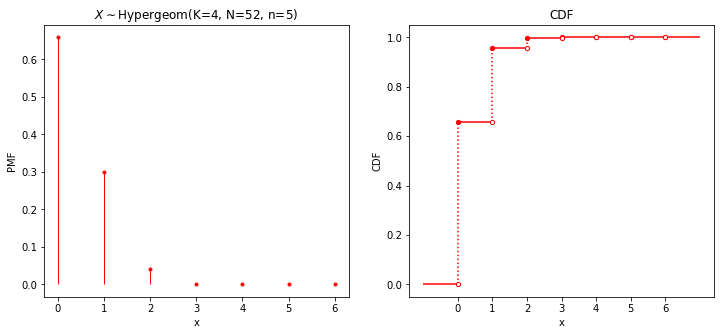

In [ ]:
# Parámetro de la distribución de poisson, lambda
l = 10

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))  # Dos paneles ax1 y ax2

x_upper = 6

# Panel 1: ax1
x = np.arange(x_upper+1)  # evaluaremos un subconjunto de los valores posibles de la v.a. x={0,...,15} 
pmfx = hypergeom.pmf(x, n=4, N=5, M=52)  # Evalúa la PMF, 𝑓𝑋(𝑥;𝑛,𝑝) definida arriba
ax1.vlines(x, [0]*len(x), pmfx, color="r", lw=1)  # grafica las líneas verticales
ax1.plot(x, pmfx, '.', color='r')  # grafica los puntos
ax1.set_xlabel("x"); ax1.set_ylabel("PMF")  # etiqueta de los ejes
ax1.set_title(r"$X \sim $Hypergeom(K=4, N=52, n=5)")  # título del panel
ax1.set_xticks(range(0, x_upper+1, 1))  # define xticks
ax1.set_xticklabels(range(0, x_upper+1, 1))  # define etiquetas de xticks

# Panel 2: ax2
xcdf = np.array(range(-1,x_upper+2))
Fx = hypergeom.cdf(x, n=4, N=5, M=52)
plot_cdf(xcdf, Fx, ax=ax2)
ax2.set_title("CDF")  # título del panel
ax2.set_xlabel("x"); ax2.set_ylabel("CDF")  # etiqueta de los ejes
ax2.set_xticks(range(0, x_upper+1, 1))  # define xticks
xt = ax2.set_xticklabels(range(0, x_upper+1, 1))  # define etiquetas de xticks

# Fuentes y recursos

[Volver al índice](#toc)

- __[Distribuciones discretas comunes](https://drive.google.com/file/d/0B-dmEvN59Z2Za25CWV81bld4Zms/view)__
- PennState Eberly College of Science, STAT 500 Applied Statistics, [Discrete distritubions](https://online.stat.psu.edu/stat500/lesson/3/3.2).
- Joseph K. Blitzstein, Jessica Hwang, [Introduction to Probability](https://www.taylorfrancis.com/books/mono/10.1201/9780429428357/introduction-probability-joseph-blitzstein-jessica-hwang).
- John Tsitsiklis, and Patrick Jaillet. [RES.6-012 Introduction to Probability](https://ocw.mit.edu/resources/res-6-012-introduction-to-probability-spring-2018/part-i-the-fundamentals/). Spring 2018. Massachusetts Institute of Technology: MIT OpenCourseWare, https://ocw.mit.edu. License: Creative Commons BY-NC-SA.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>